In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import joblib


In [28]:
df=pd.read_csv('customer retention-3.csv',encoding= 'unicode_escape',header=None)
pd.set_option('display.max_columns',None)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,1,2,Delhi,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
1,1,2,Greater Noida,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
2,0,2,Karnal,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
3,1,2,Bangalore,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",Paytm.com,"Amazon.in, Myntra.com","Amazon.in, Myntra.com","Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
4,1,3,Noida,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,4,5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com",Paytm.com,"Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com","Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"


# Feature names and number of categories inside each feature
for i in df.columns:
    if df[i].nunique()>=1:
        print(i,df[i].nunique())
    

In [31]:
df[0].value_counts() 

1    180
0     88
Name: 0, dtype: int64

In [34]:
df[46].value_counts() 

4    149
5     81
3     38
Name: 46, dtype: int64

In [35]:
df[47].value_counts() 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            11
Amazon.in, Flipkart.com, Paytm.com                               7
Name: 47, dtype: int64

# Target

In [36]:
df[0].value_counts() 

1    180
0     88
Name: 0, dtype: int64

# Feature Engineering

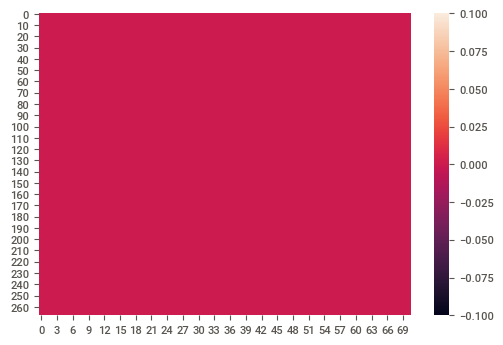

In [37]:
sns.heatmap(df.isnull())#no missing value in the dataset.
#But there are '?' signs which are actually missing values which are not detected as missing values by the system.

# EDA by sweetviz library

In [38]:
#df['1Gender of respondent']=df['1Gender of respondent'].replace(['',''],[0,1])
#target feature must be numerical to apply sweetviz library
#multiclass still not supported by sweetviz.
#we can do a dtale libray on each fature and check describe to understand each feature.
#Atleast with dtale we can see each feature graph and copy paste required code after analysis on to our jupyter notebook.

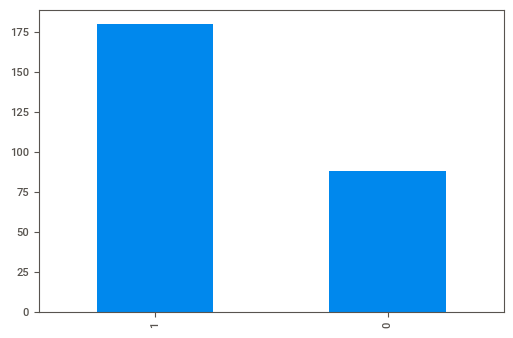

In [39]:
df[0].value_counts().plot.bar()#imbalance data.
#We will apply data balancinging technique here.
#Later in  we start the model building part right after the EDA by Sweetviz process with the Gender factor as the target value.

In [40]:
import sweetviz    
#Due to multiclass classification problem here sweetviz library is giving error even after label encodeing(.replace()here).
#this is yet to be worked out by the developers.

# #no target_feat

In [41]:
my_report1=sweetviz.analyze([df,'df']) #no target_feat

:FEATURES DONE:                    |█████████████████████| [100%]   00:23  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [43]:
my_report1.show_html('no Target.html')

Report no Target.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# target_feat='1Gender of respondent'

In [45]:
my_report=sweetviz.analyze([df,'df'],target_feat=0)


                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
:0:                                |▎                    | [  1%]   00:00  -> (00:03 left)
:0:                                |▌                    | [  3%]   00:00  -> (00:10 left)
:1:                                |▌                    | [  3%]   00:00  -> (00:10 left)
:1:                                |▉                    | [  4%]   00:00  -> (00:13 left)
:2:                                |▉                    | [  4%]   00:00  -> (00:13 left)
:2:                                |█▏                   | [  6%]   00:01  -> (00:22 left)
:3:                                |█▏                   | [  6%]   00:01  -> (00:22 left)
:3:                                |█▍                   | [  7%]   00:01  -> (00:30 left)
:4:                                |█▍                   | [  7%]   00:01  -> (00:30 left

:42:                               |████████████▊        | [ 61%]   00:14  -> (00:07 left)
:43:                               |████████████▊        | [ 61%]   00:14  -> (00:07 left)
:43:                               |█████████████▏       | [ 62%]   00:14  -> (00:07 left)
:44:                               |█████████████▏       | [ 62%]   00:14  -> (00:07 left)
:44:                               |█████████████▍       | [ 64%]   00:14  -> (00:07 left)
:45:                               |█████████████▍       | [ 64%]   00:14  -> (00:07 left)
:45:                               |█████████████▋       | [ 65%]   00:15  -> (00:09 left)
:46:                               |█████████████▋       | [ 65%]   00:15  -> (00:09 left)
:46:                               |██████████████       | [ 67%]   00:15  -> (00:08 left)
:47:                               |██████████████       | [ 67%]   00:15  -> (00:08 left)
:47:                               |██████████████▎      | [ 68%]   00:15  -> (00:08 left)

Creating Associations graph... DONE!


In [46]:
my_report.show_html('Target-[0]1Gender of respondent.html')

Report Target-[0]1Gender of respondent.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Dtale library

In [47]:
import dtale

In [48]:
dtale.show(df)

In [49]:
df.dtypes

0      int64
1      int64
2     object
3      int64
4      int64
       ...  
66    object
67    object
68    object
69    object
70    object
Length: 71, dtype: object

In [50]:
df.describe()

,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.671642,2.958955,220877.899254,3.518657,2.667910,3.257463,1.671642,4.279851,1.779851,1.276119,1.361940,2.552239,3.925373,1.776119,2.884328,2.682836,4.384328,4.141791,3.876866,4.108209,4.287313,4.126866,4.402985,4.376866,4.264925,4.462687,4.593284,4.376866,3.925373,3.574627,4.339552,4.597015,3.955224,4.291045,4.589552,4.380597,4.179104,4.152985,4.354478,4.272388,3.917910,3.552239,3.220149,3.496269,3.279851,4.160448
std,0.470495,1.068003,140624.263849,1.436426,1.652876,1.137108,0.841580,0.924107,0.797964,0.646417,0.899213,1.263531,1.196918,1.078505,1.030280,1.346435,1.048298,0.917193,1.068684,1.084211,1.061546,1.048785,1.155475,0.942021,0.968009,1.082075,0.661028,0.917856,1.158760,1.297516,0.848221,0.817591,1.124235,0.786826,0.650125,0.885123,1.072997,0.840741,0.752834,0.992699,0.692912,1.067513,1.220934,1.140005,1.180381,0.647961
min,0.000000,1.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,1.000000,4.000000,5.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# EDA

# checking relation of each attribute w.r.t target attribute

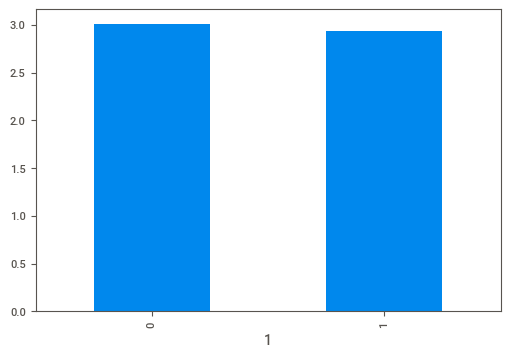

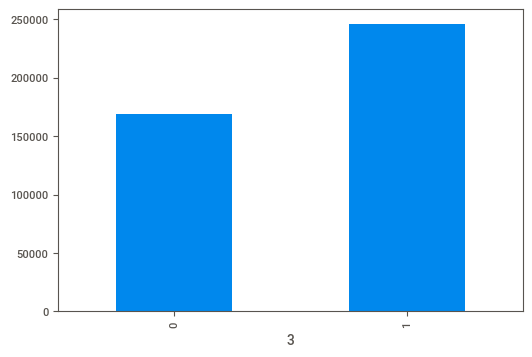

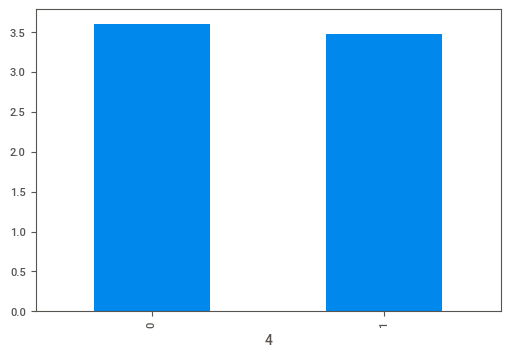

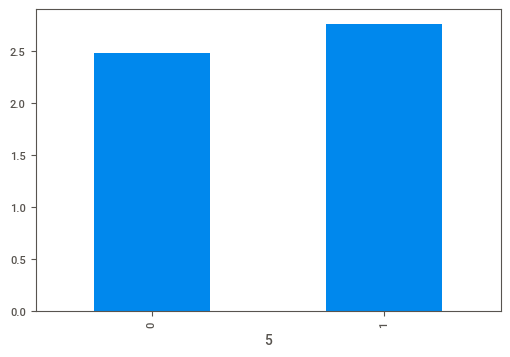

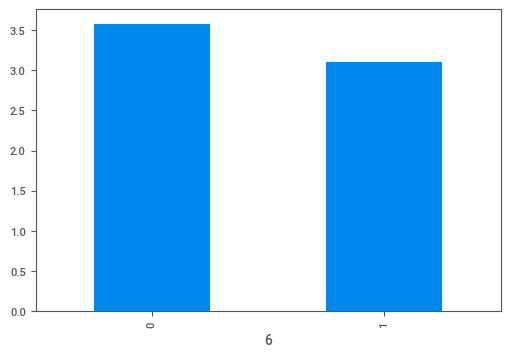

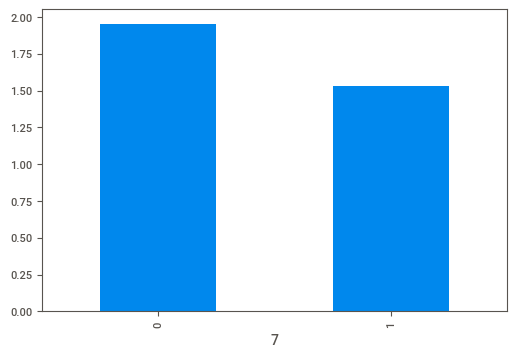

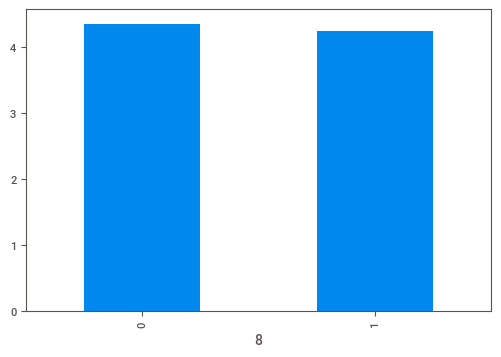

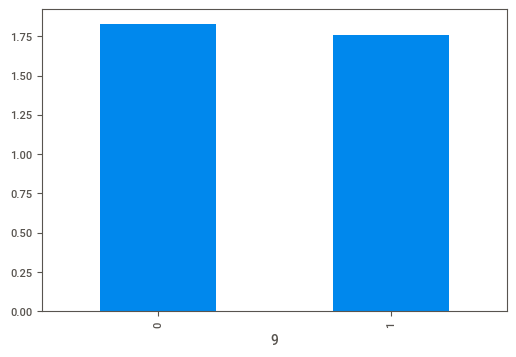

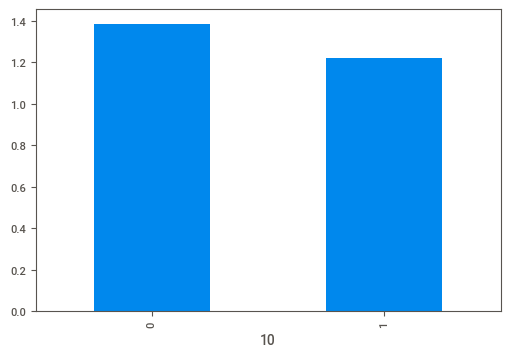

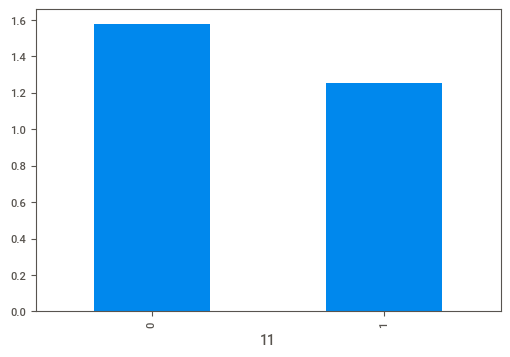

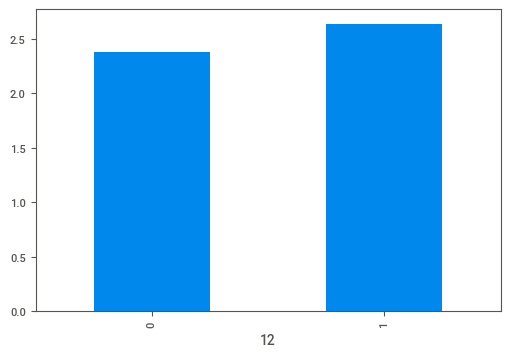

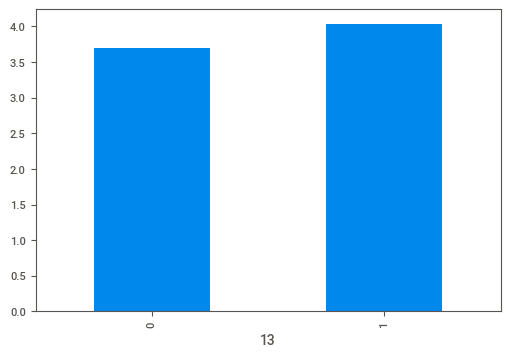

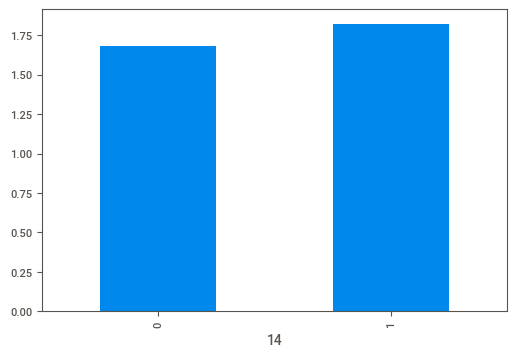

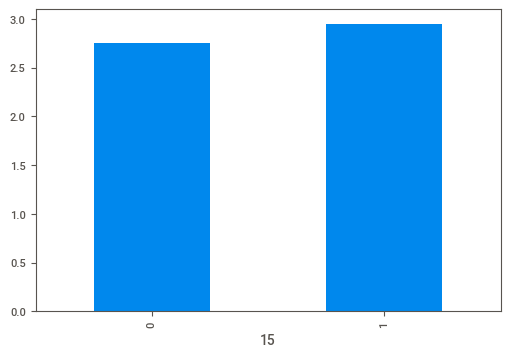

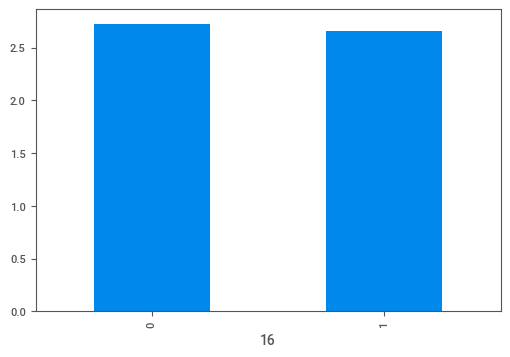

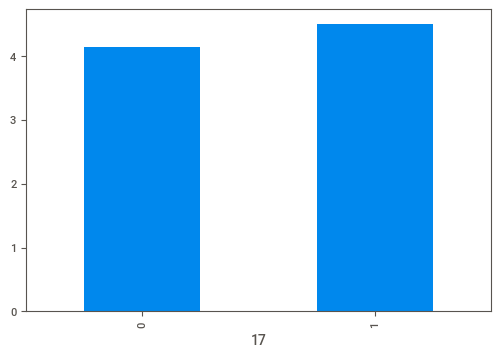

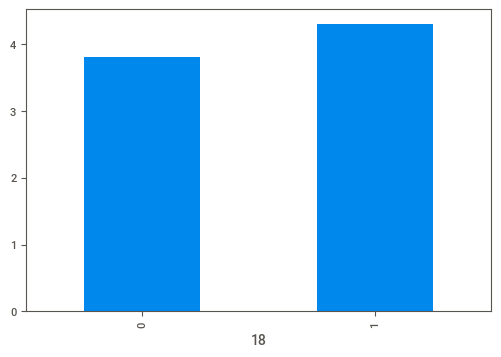

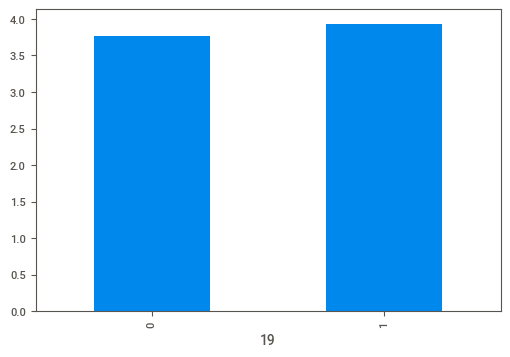

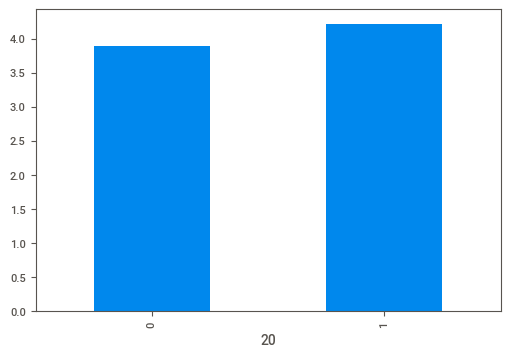

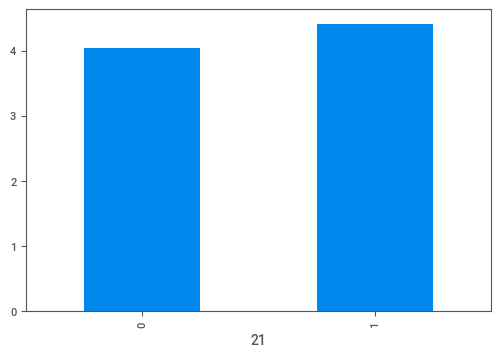

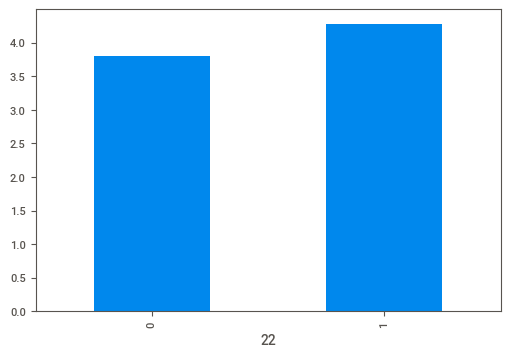

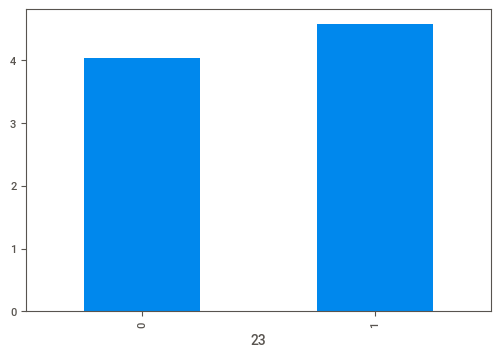

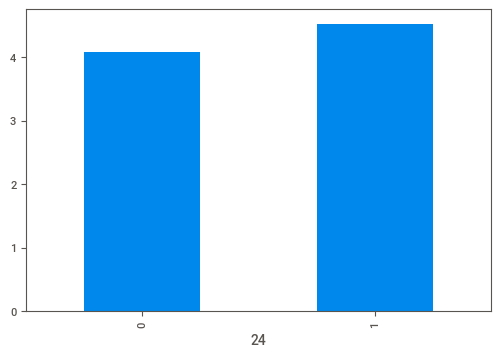

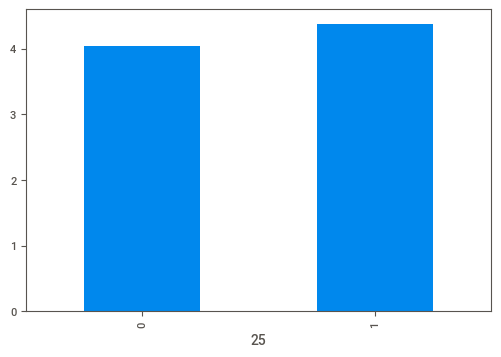

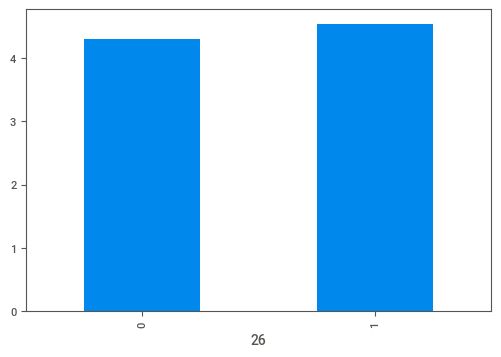

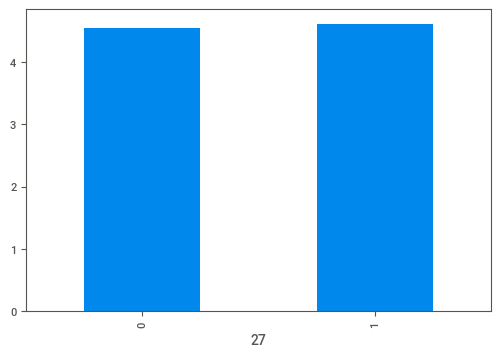

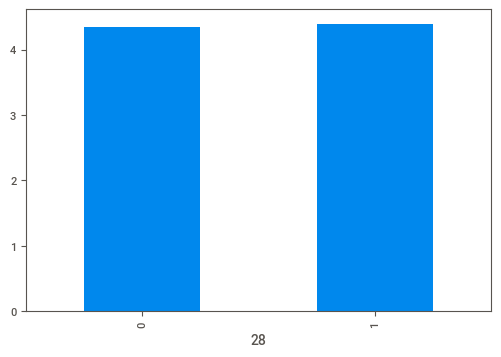

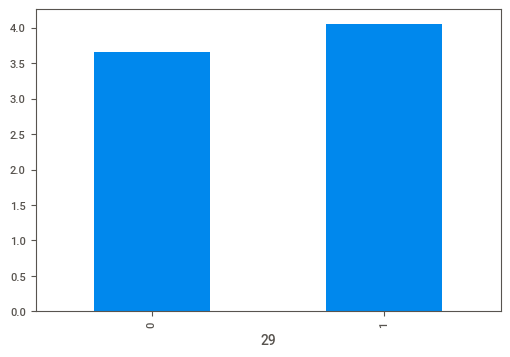

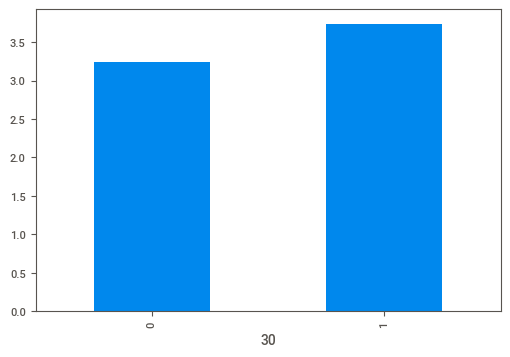

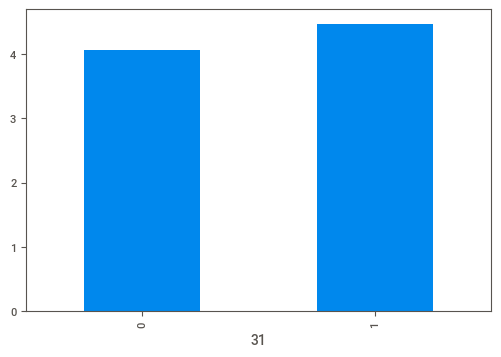

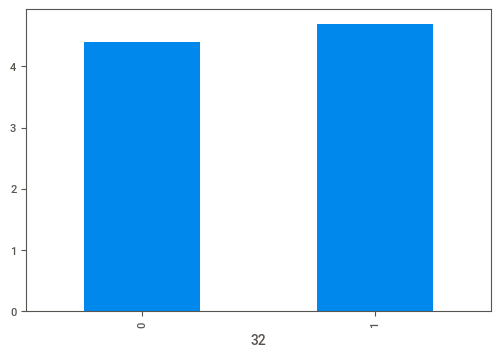

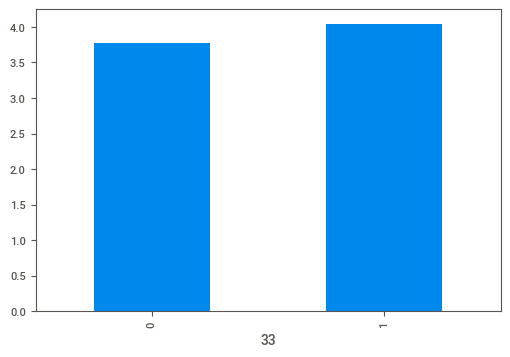

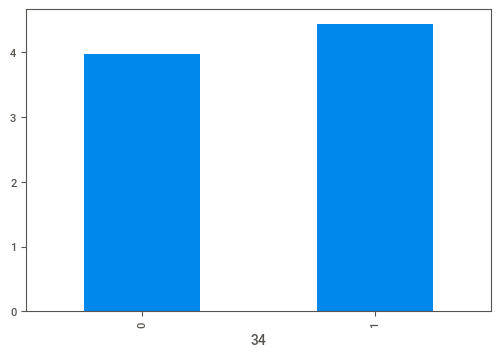

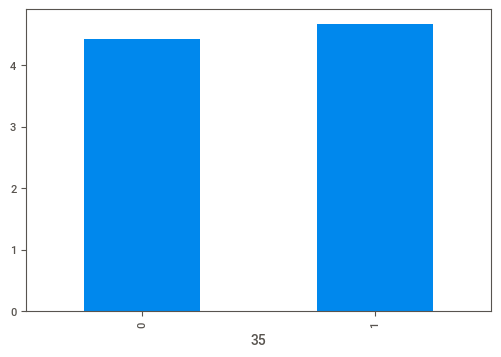

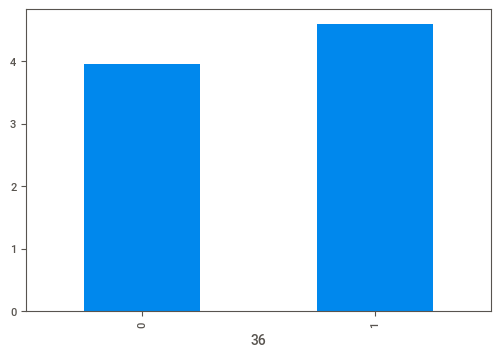

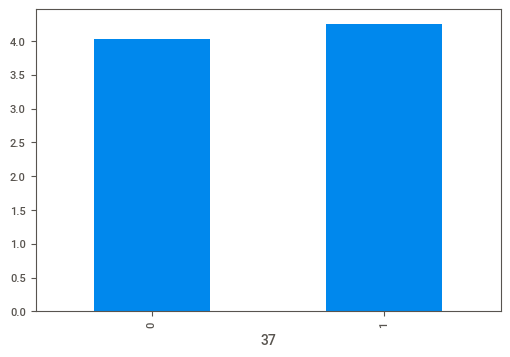

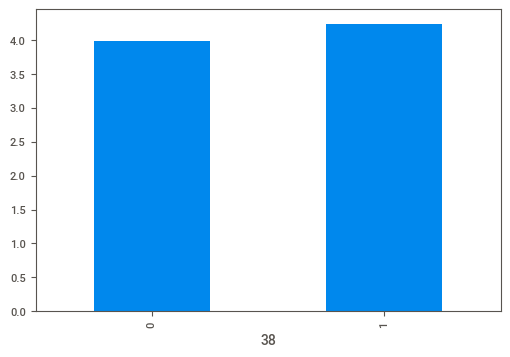

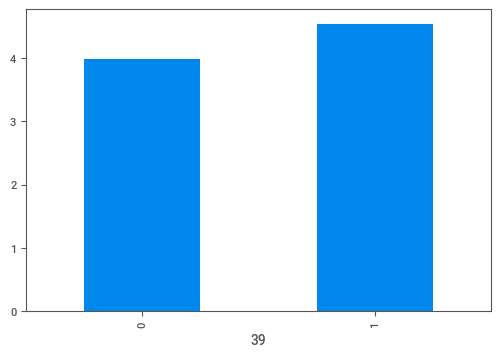

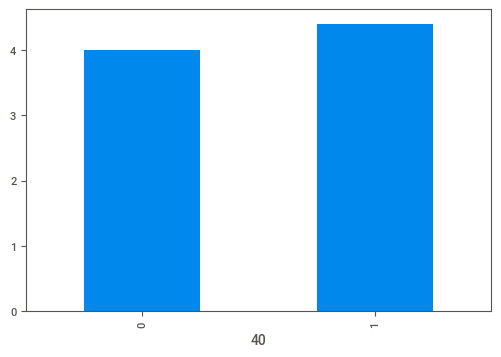

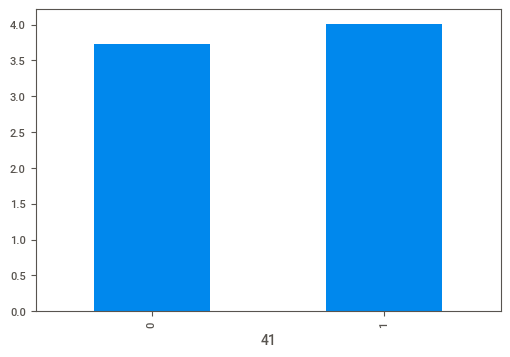

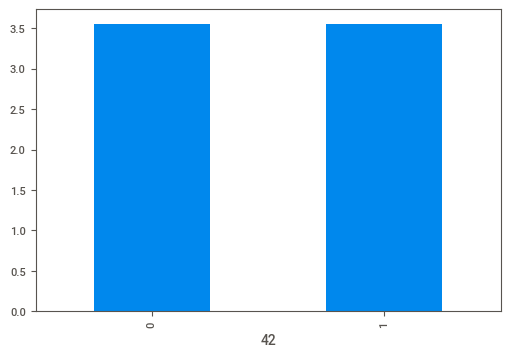

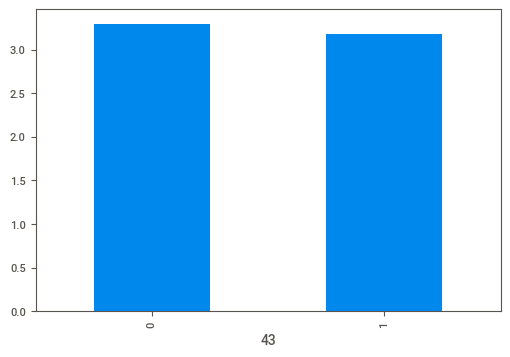

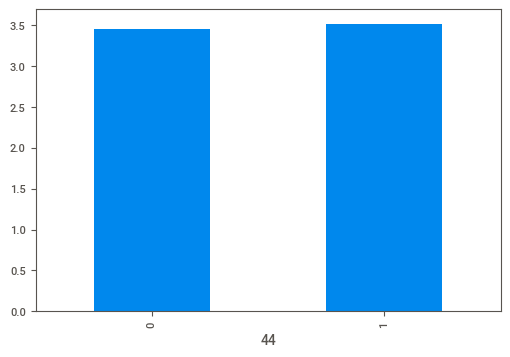

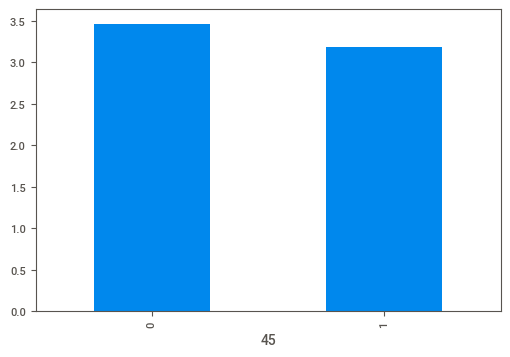

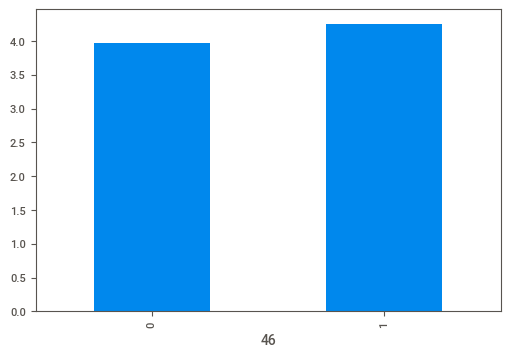

In [51]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df.groupby(0)[feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.show()


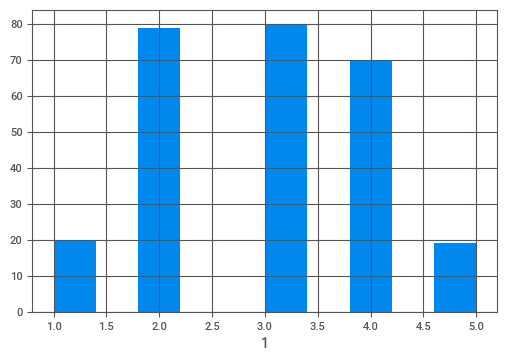

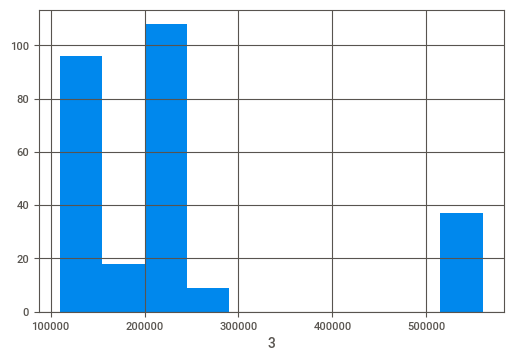

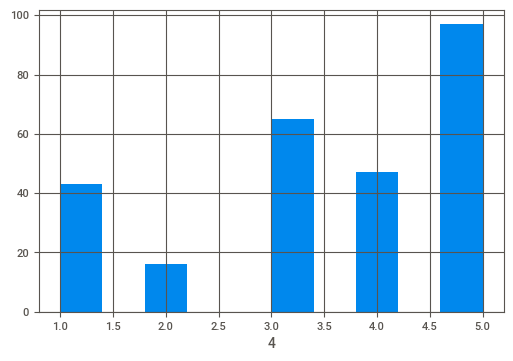

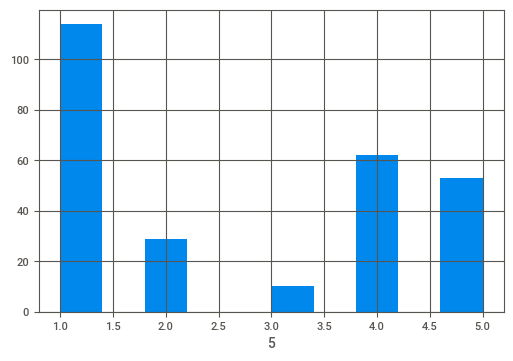

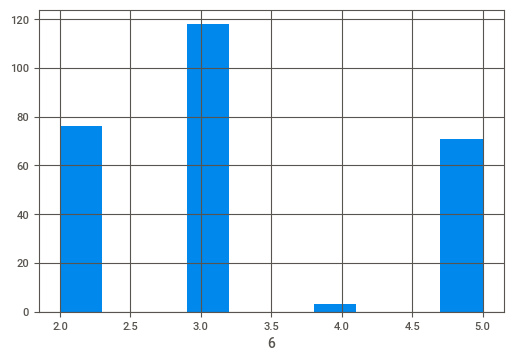

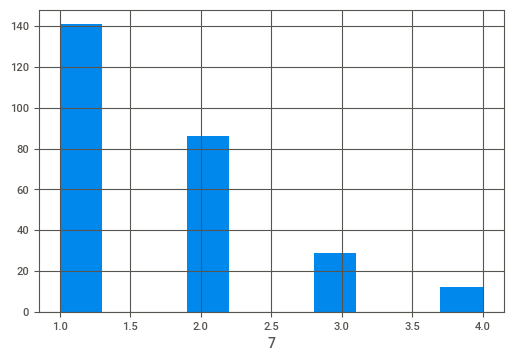

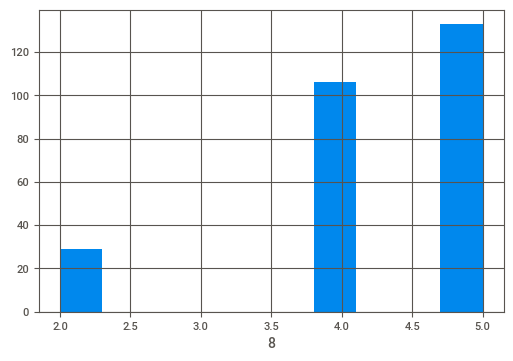

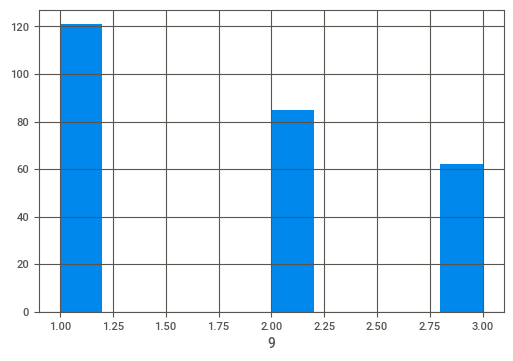

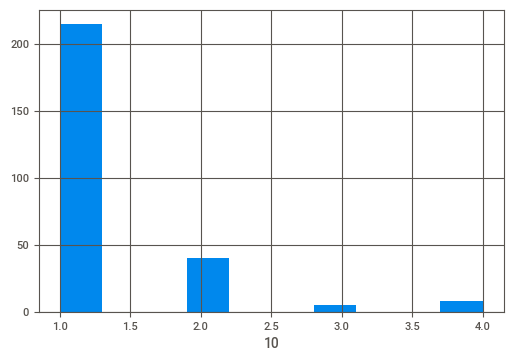

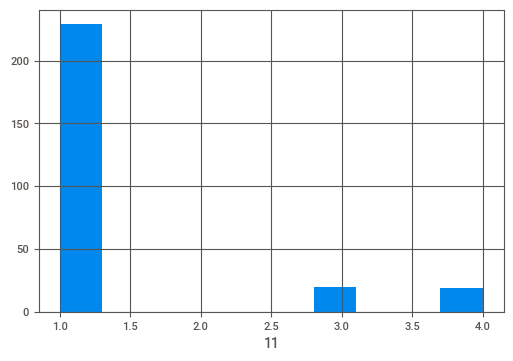

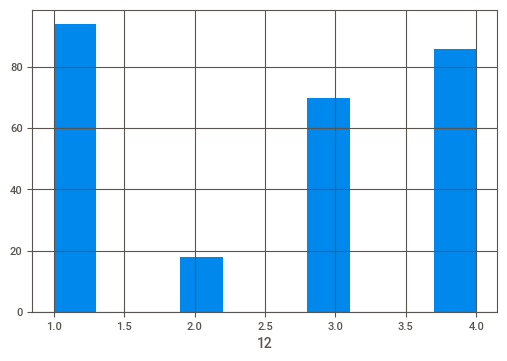

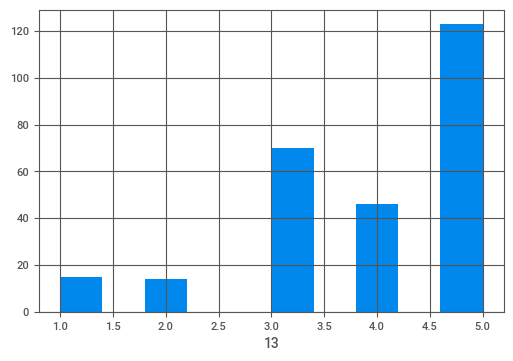

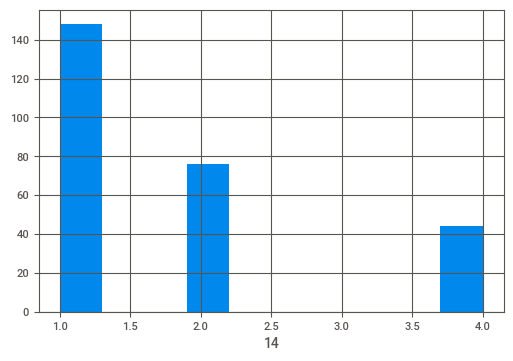

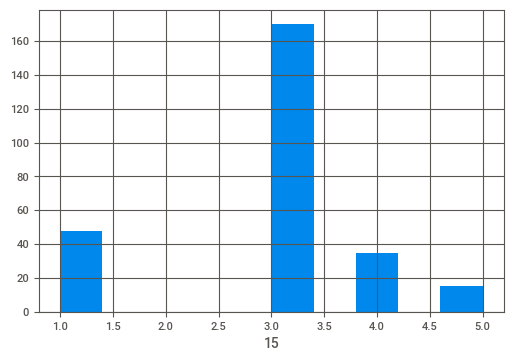

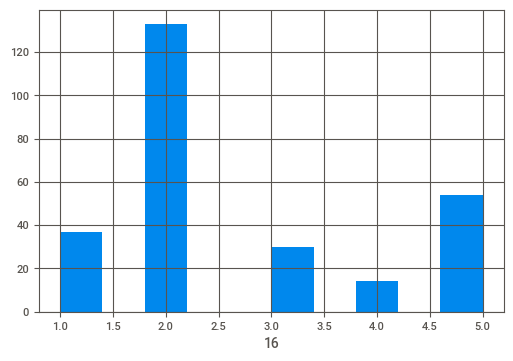

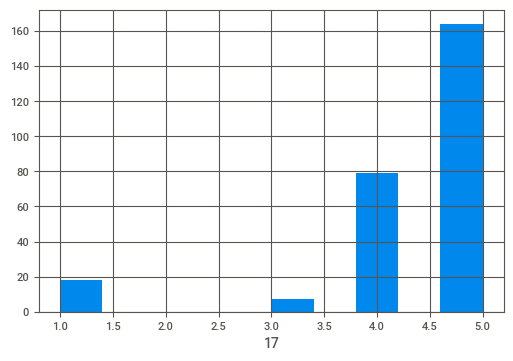

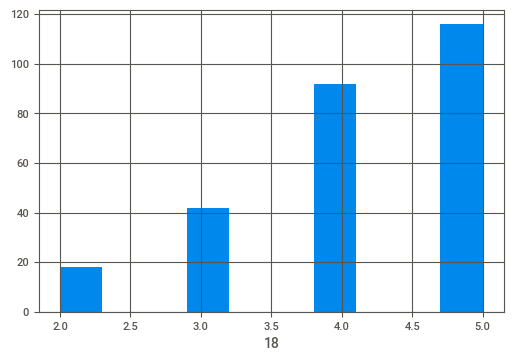

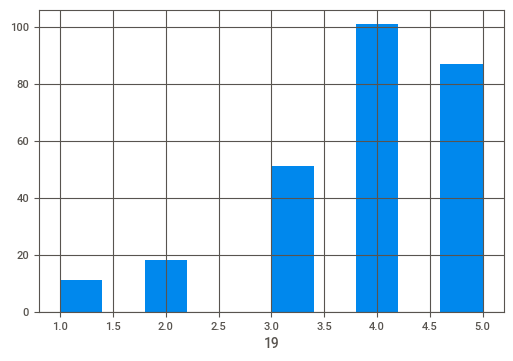

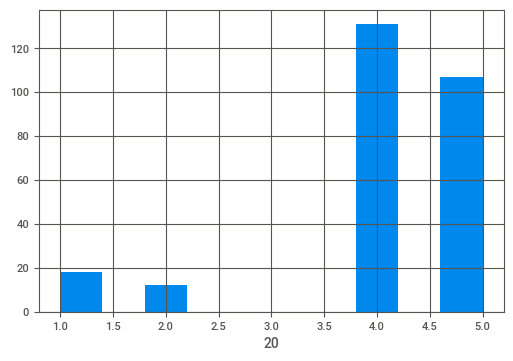

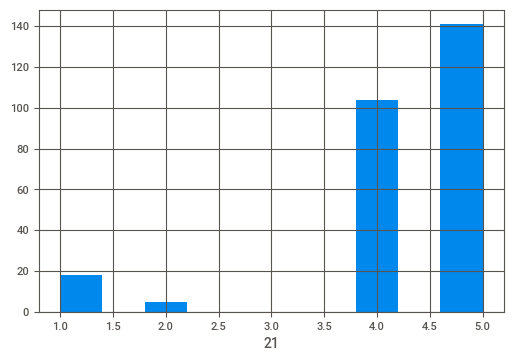

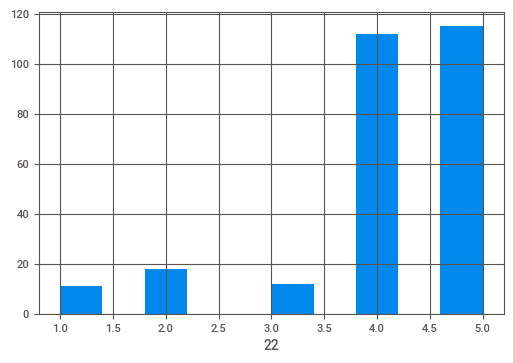

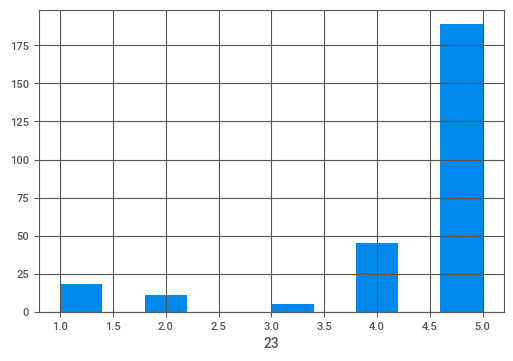

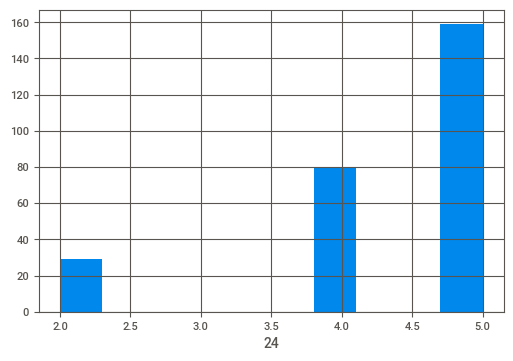

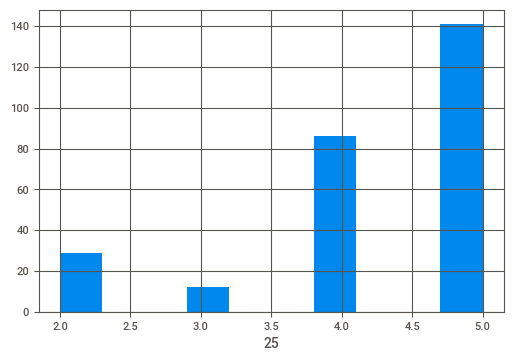

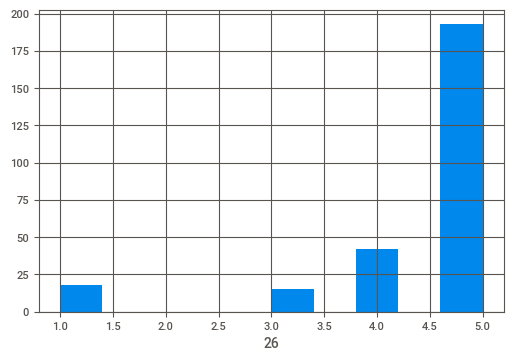

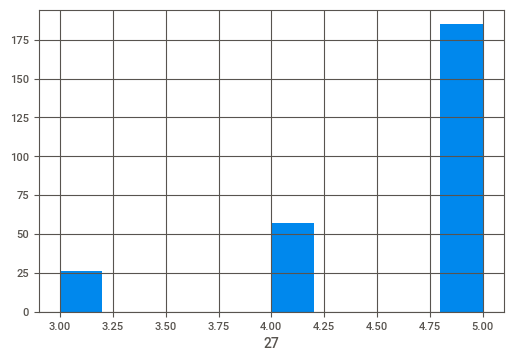

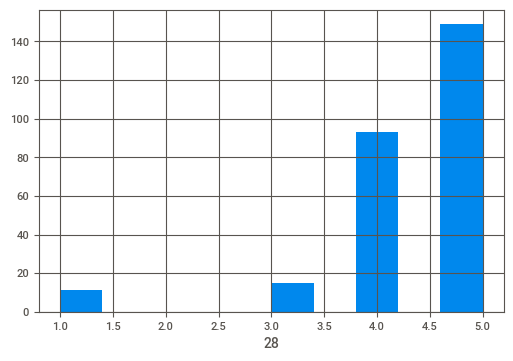

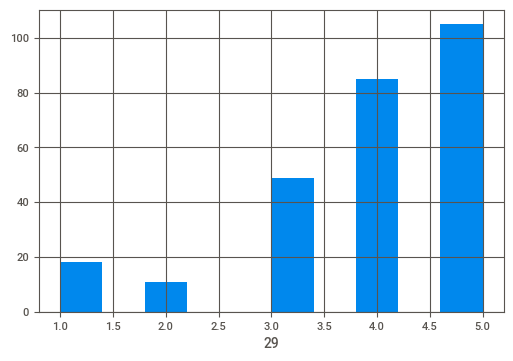

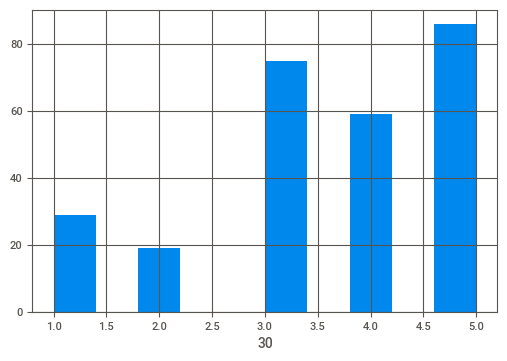

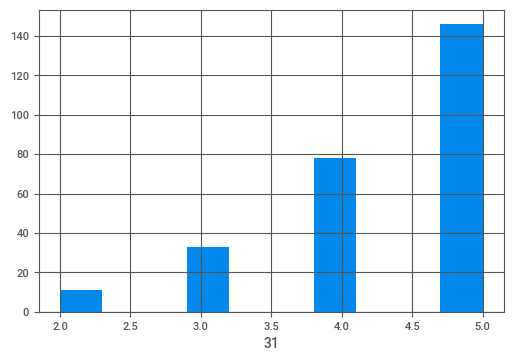

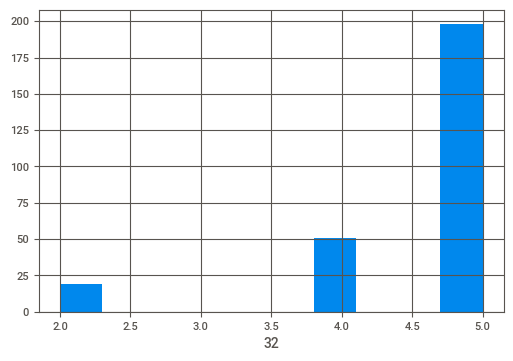

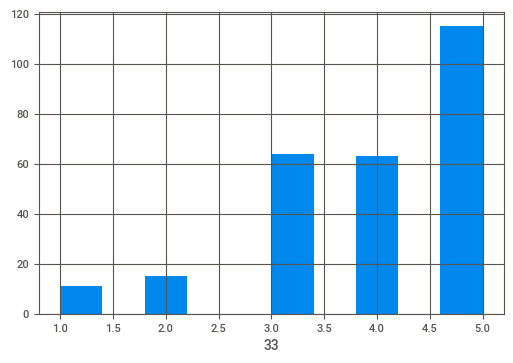

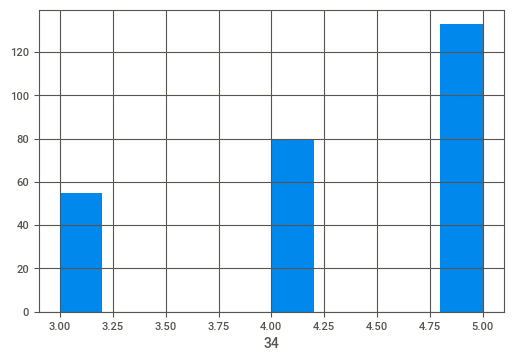

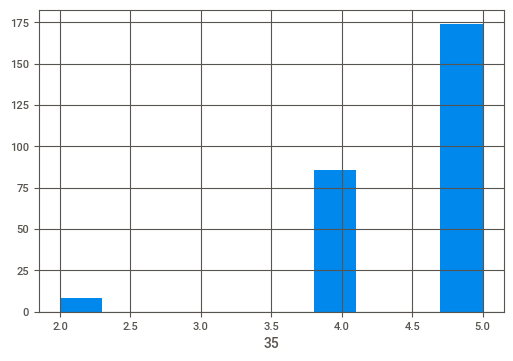

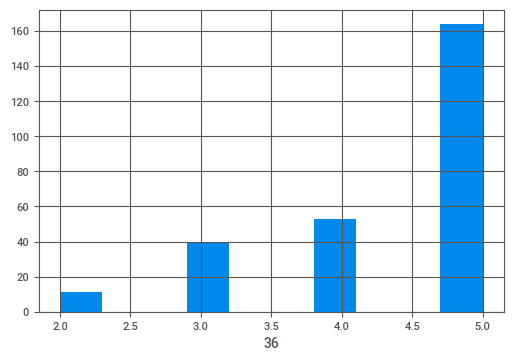

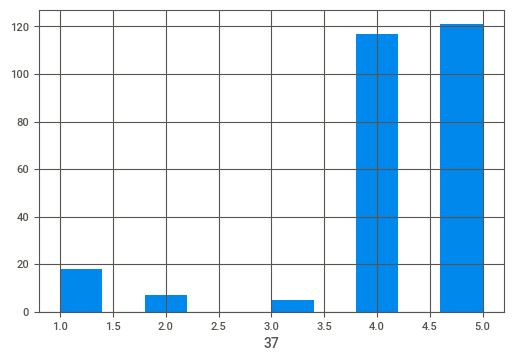

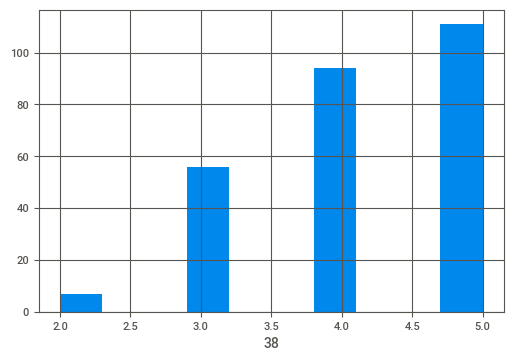

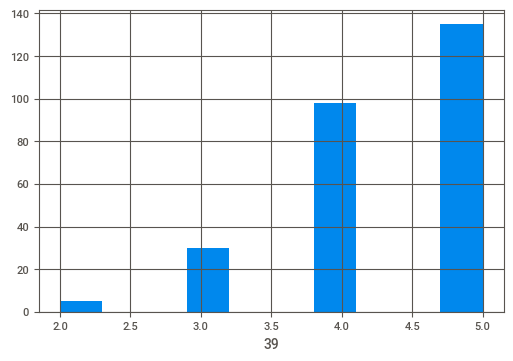

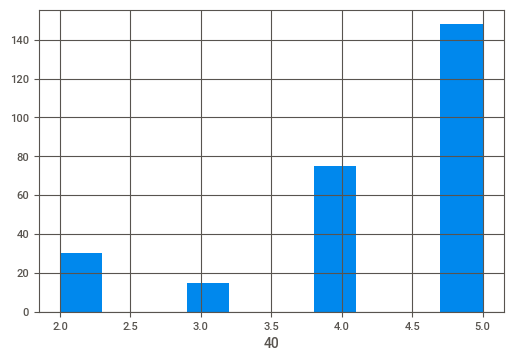

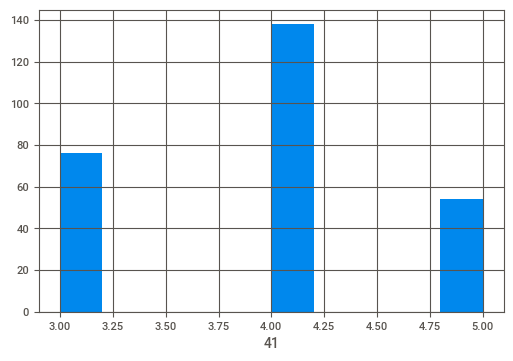

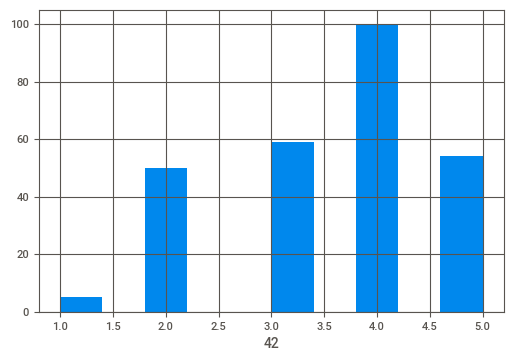

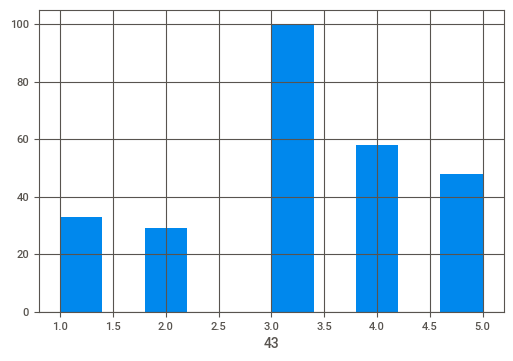

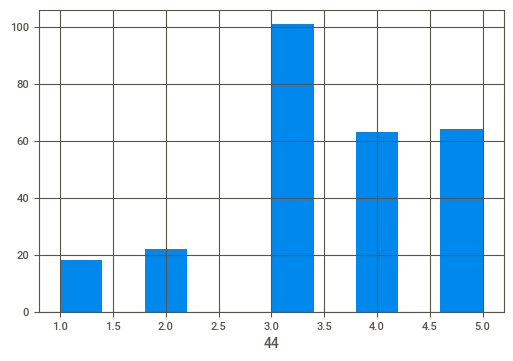

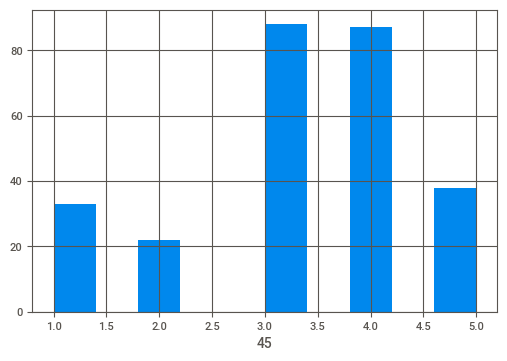

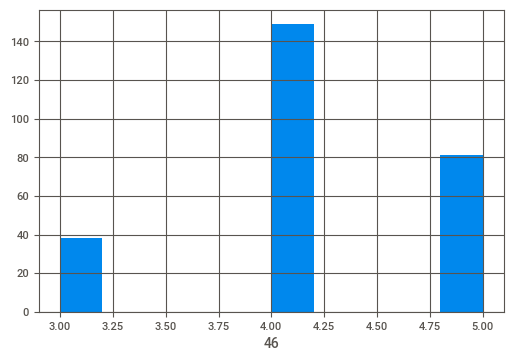

In [52]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

# checking for outliers

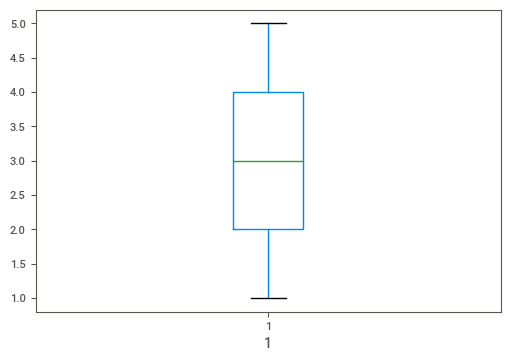

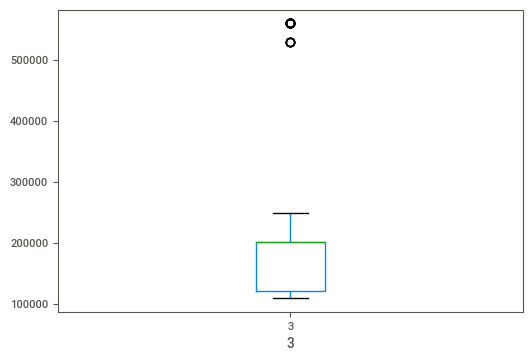

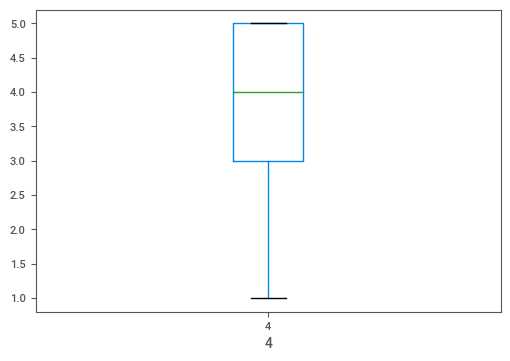

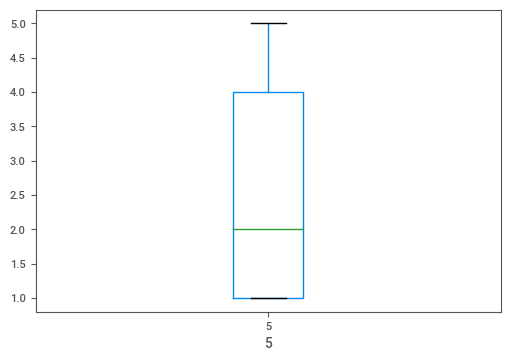

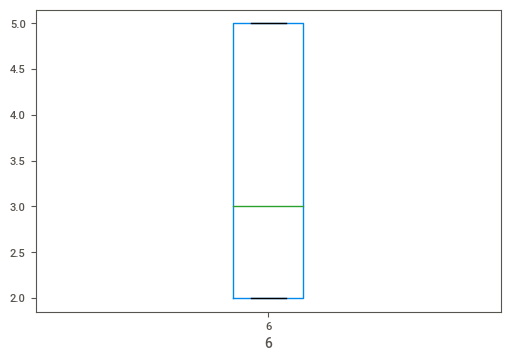

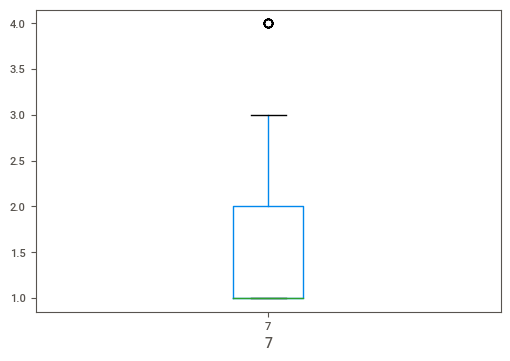

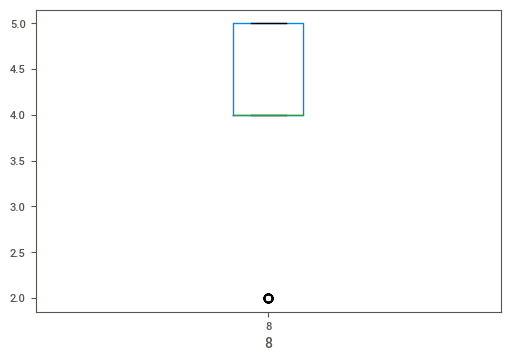

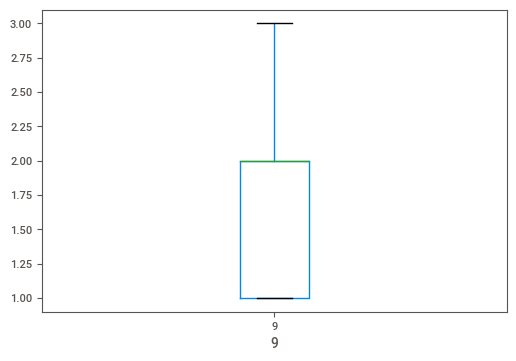

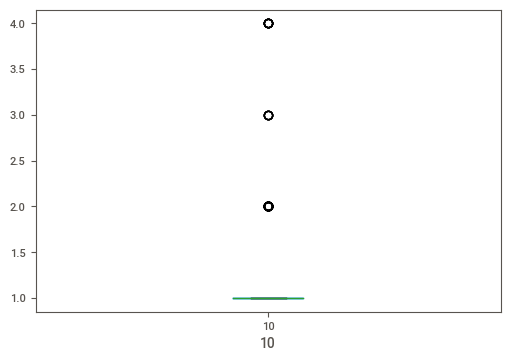

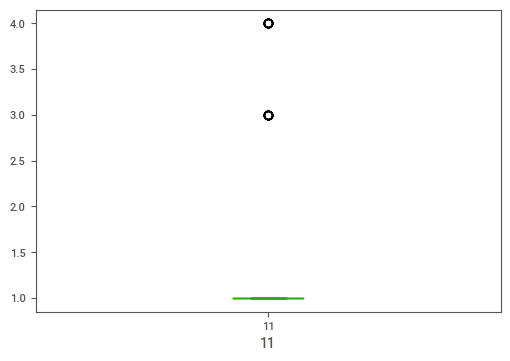

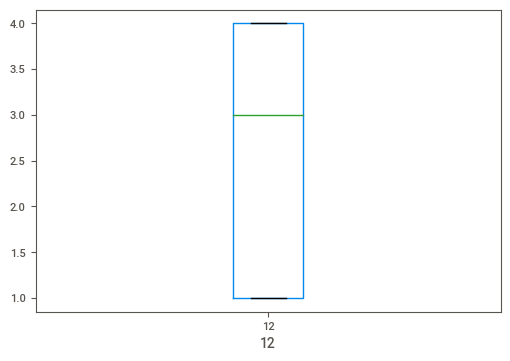

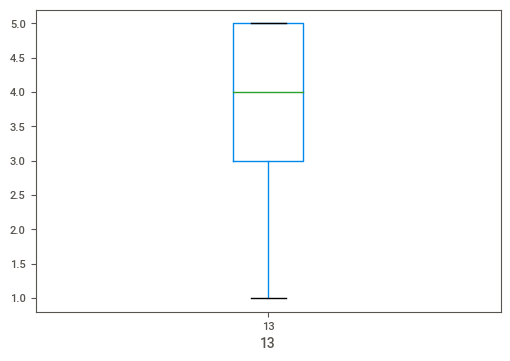

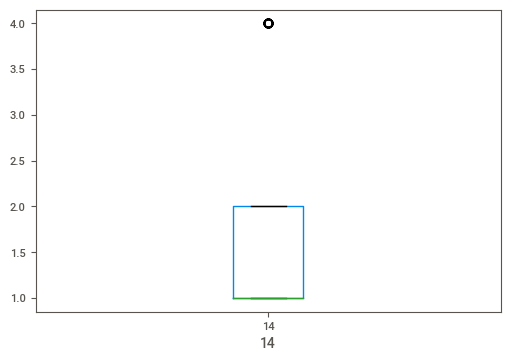

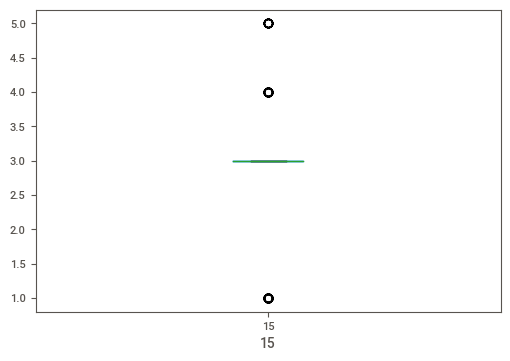

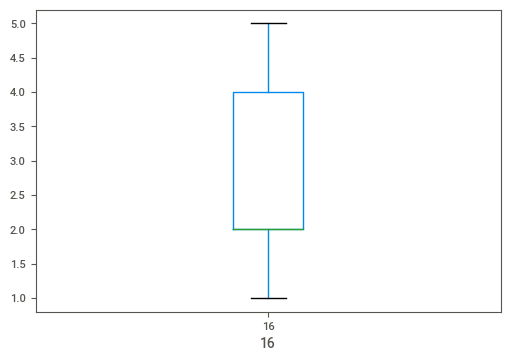

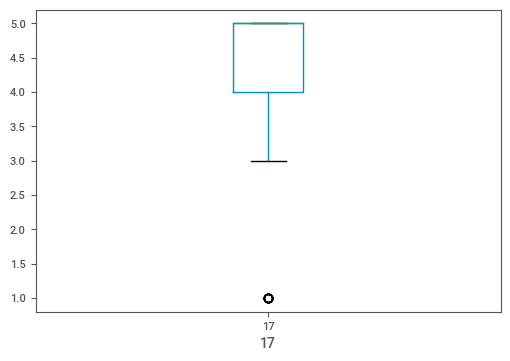

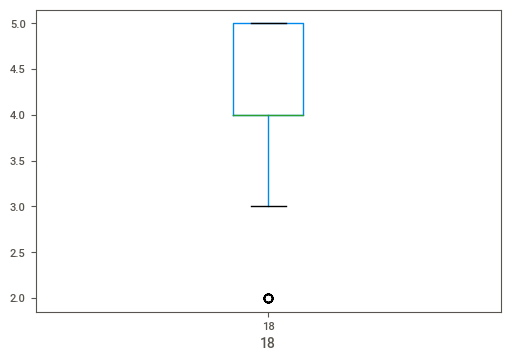

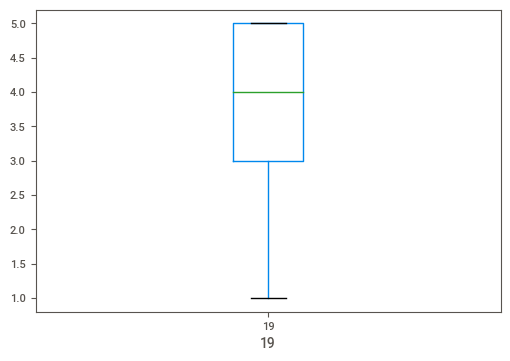

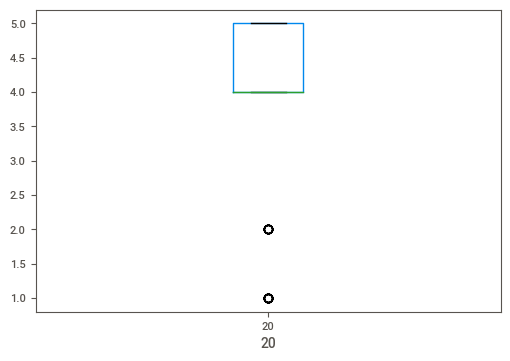

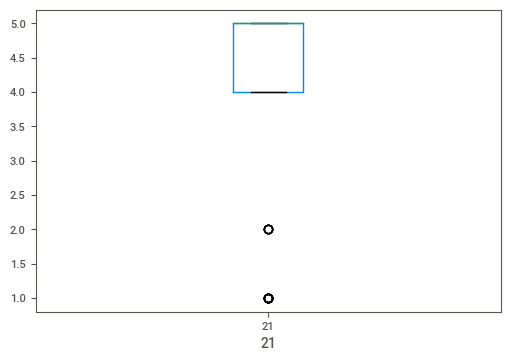

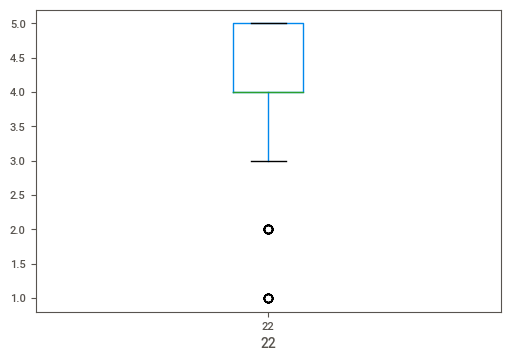

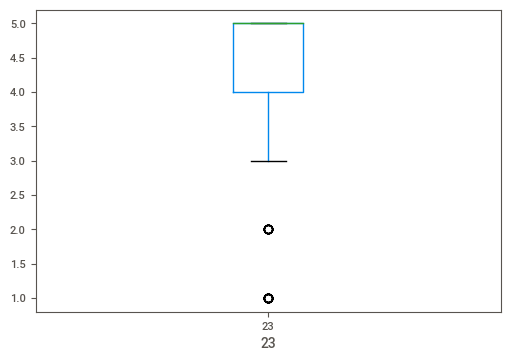

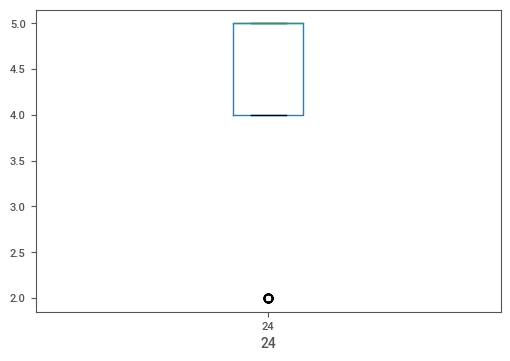

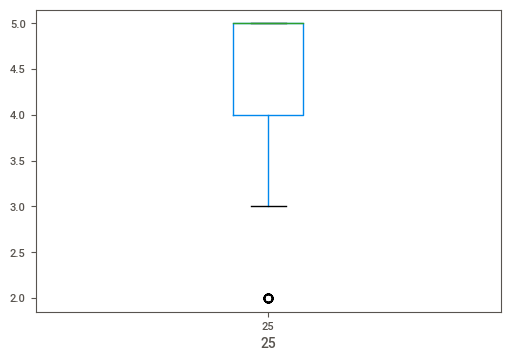

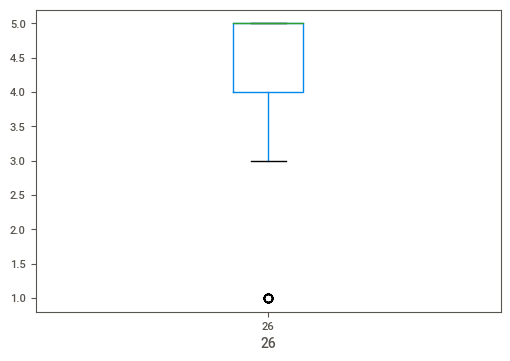

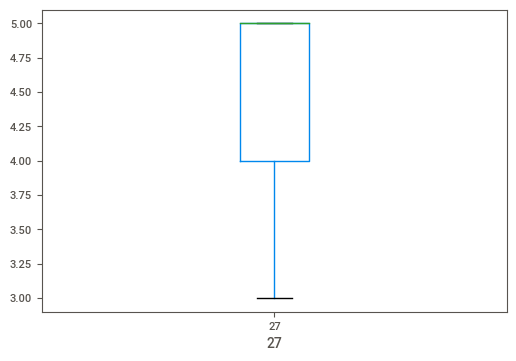

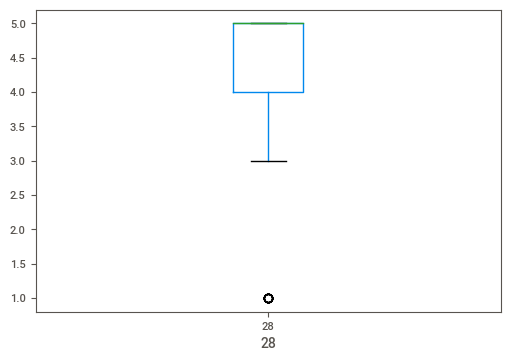

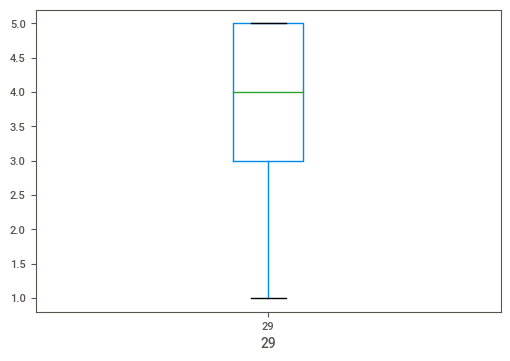

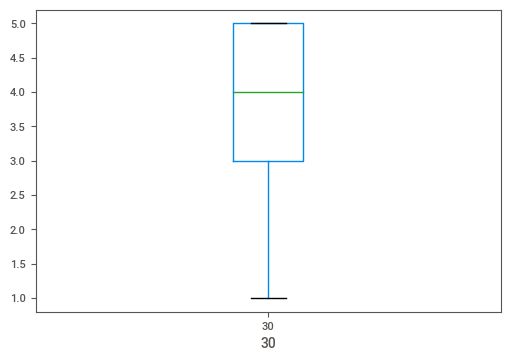

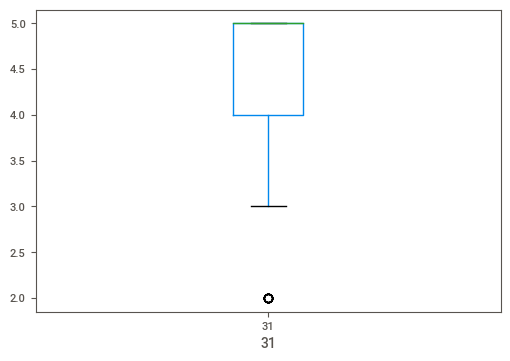

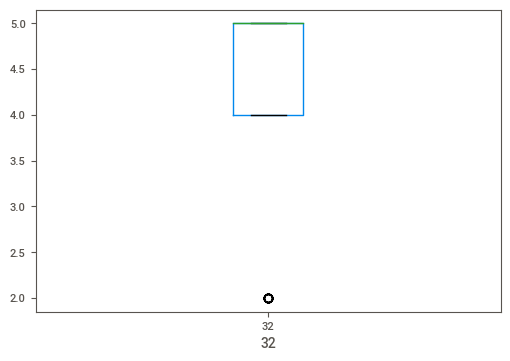

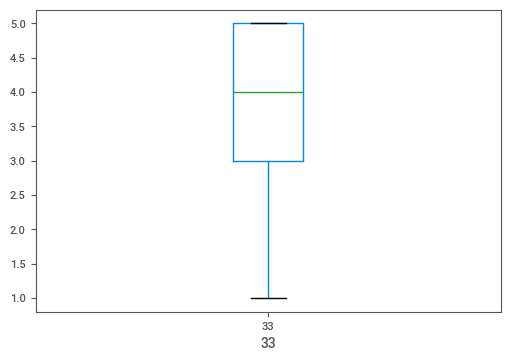

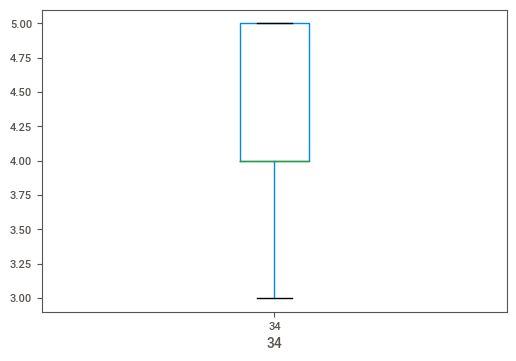

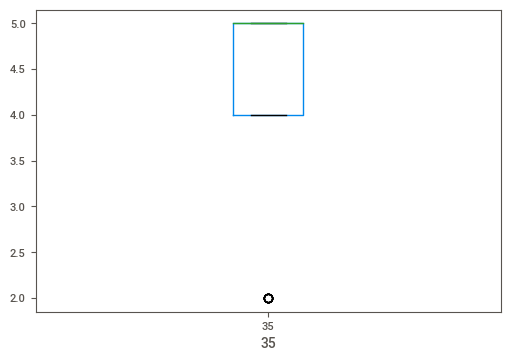

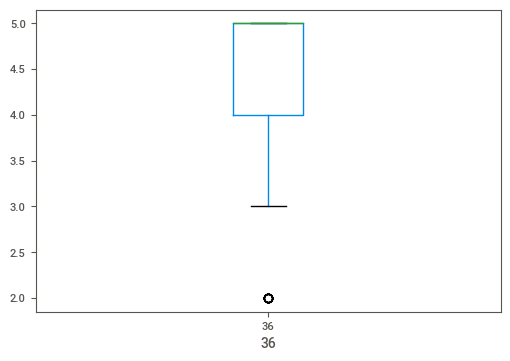

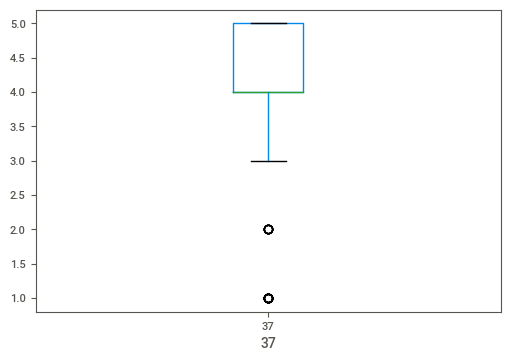

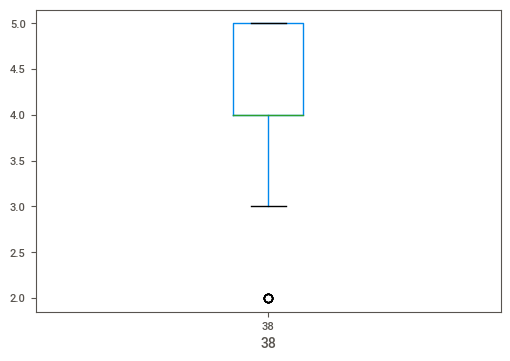

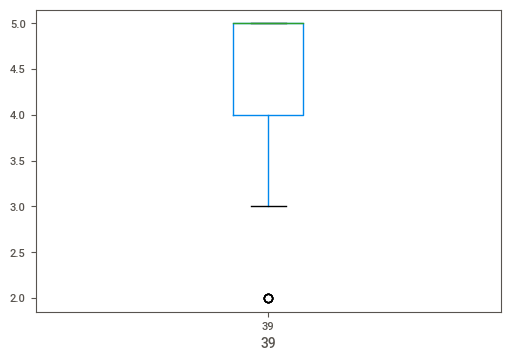

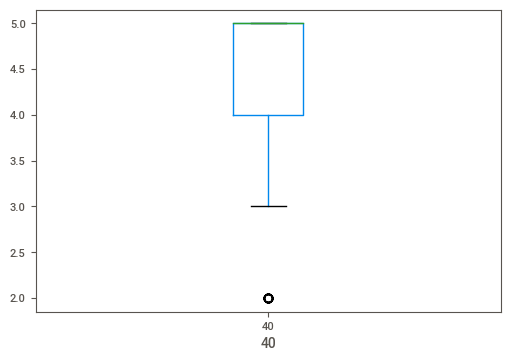

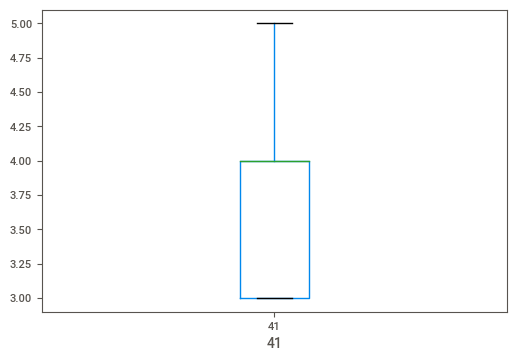

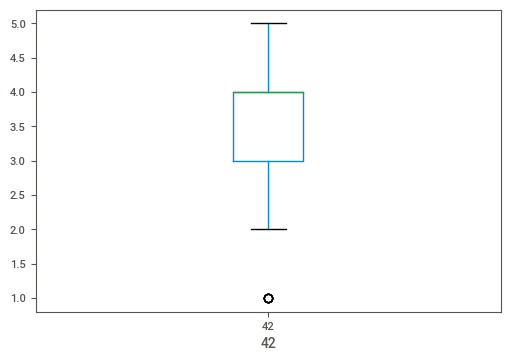

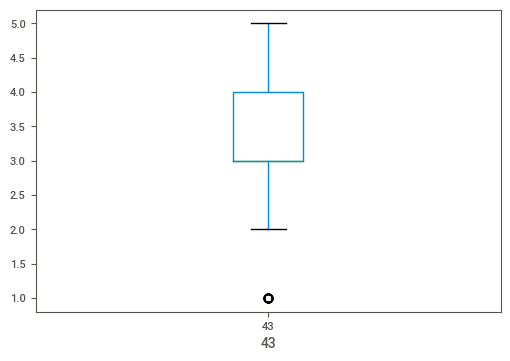

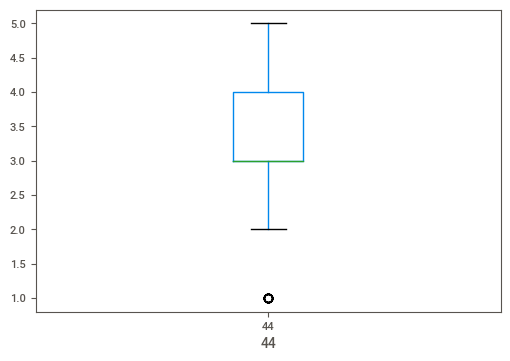

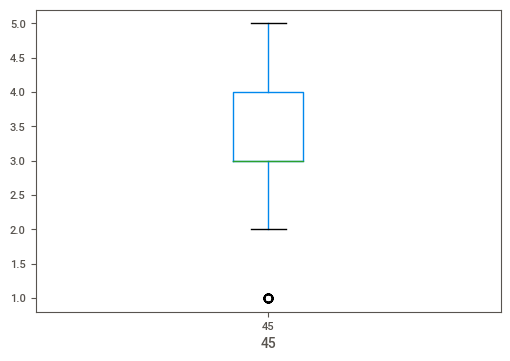

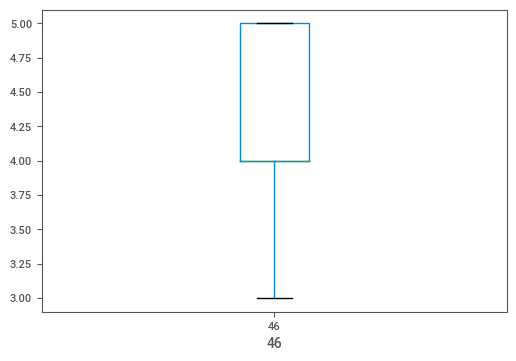

In [53]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature==0:
        pass
    else:
    
        df[feature].plot.box()
        plt.xlabel(feature)
        plt.show()

# checking if imbalanced dataset

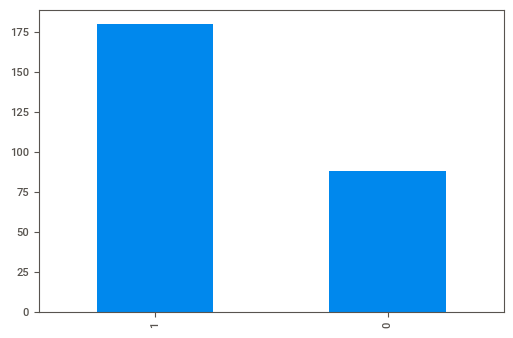

In [54]:
#Imbalanced dataset
df[0].value_counts().plot.bar()

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,1,2,Delhi,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
1,1,2,Greater Noida,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
2,0,2,Karnal,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
3,1,2,Bangalore,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",Paytm.com,"Amazon.in, Myntra.com","Amazon.in, Myntra.com","Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
4,1,3,Noida,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,4,5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com",Paytm.com,"Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com","Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"


# Label encoding by enumerate function where in a feature the priority is given to categories which are repeated maximum time.

In [56]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [57]:
categorical_features

[2,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [58]:
for feature in categorical_features:
    labels_sorted=df[feature].value_counts().sort_values().index
   
    labels_ordered={k:i for i,k in enumerate(labels_sorted,0)}
    df[feature]=df[feature].map(labels_ordered) #.map({})

In [59]:
categorical_features

[2,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [60]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,1,2,10,110030,5,5,2,1,2,3,1,1,4,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,7,7,4,5,5,6,3,5,9,4,3,2,2,4,7,7,5,7,7,4,6,6,5,4
1,1,2,9,201308,4,5,3,1,4,2,1,1,4,4,4,3,5,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,3,4,6,6,7,8,6,3,6,5,10,5,6,5,6,7,7,10,6,5,5,4,7,3
2,0,2,6,132001,4,1,3,1,4,3,2,1,1,3,1,1,2,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,8,9,7,8,10,3,7,7,9,3,8,7,7,9,4,5,7,9,3,5,4,2,4,6
3,1,2,7,530068,3,2,2,1,2,3,2,3,4,5,1,4,2,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,8,9,5,4,6,9,6,1,8,5,5,3,6,3,3,3,6,9,7,5,6,5,2,4
4,1,3,8,201308,5,5,2,1,4,2,1,1,4,5,4,4,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,4,5,8,9,9,2,8,8,1,4,8,5,7,9,1,2,2,0,2,2,1,3,5,3,7,1


In [61]:
df.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
66    int64
67    int64
68    int64
69    int64
70    int64
Length: 71, dtype: object

In [62]:
df.dtypes=='O'

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

# Separating target and independent variables

In [63]:
y=df[0]
X=df.drop([0],axis=1)

# Applying Log transformation to remove skewness

In [64]:
for col in X.columns:
    if X.skew().loc[col]>0.55:
        X[col]=np.log1p(X[col])
    

In [65]:
X.skew()

1     0.063559
2    -0.769088
3     0.999480
4    -0.549489
5     0.235265
        ...   
66   -0.538985
67   -1.008735
68   -0.584991
69   -0.955178
70   -0.932447
Length: 70, dtype: float64

In [66]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,2,10,11.608517,5,5,1.098612,0.693147,2,3,0.693147,0.693147,4,5,0.693147,5,1.791759,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,7,7,4,5,5,6,3,5,9,4,3,2,2,4,7,7,5,7,7,4,6,6,5,4
1,2,9,12.212596,4,5,1.386294,0.693147,4,2,0.693147,0.693147,4,4,1.609438,3,1.791759,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,4,4,4,3,3,4,3,4,6,6,7,8,6,3,6,5,10,5,6,5,6,7,7,10,6,5,5,4,7,3
2,2,6,11.790572,4,1,1.386294,0.693147,4,3,1.098612,0.693147,1,3,0.693147,1,1.098612,4,4,3,4,5,4,5,5,4,5,5,4,4,3,3,4,3,3,4,3,4,4,4,5,4,4,5,4,3,4,8,9,7,8,10,3,7,7,9,3,8,7,7,9,4,5,7,9,3,5,4,2,4,6
3,2,7,13.180762,3,2,1.098612,0.693147,2,3,1.098612,1.386294,4,5,0.693147,4,1.098612,5,3,3,4,4,5,5,5,4,5,4,5,5,5,5,5,2,4,5,5,5,4,4,5,4,3,1,5,1,5,8,9,5,4,6,9,6,1,8,5,5,3,6,3,3,3,6,9,7,5,6,5,2,4
4,3,8,12.212596,5,5,1.098612,0.693147,4,2,0.693147,0.693147,4,5,1.609438,4,1.098612,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,4,5,8,9,9,2,8,8,1,4,8,5,7,9,1,2,2,0,2,2,1,3,5,3,7,1


# Scaling the Data

In [67]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [68]:
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,-0.899575,1.136126,-1.102727,1.033199,1.413568,-1.222903,-0.86088,-2.4717,1.531939,-0.458173,-0.408087,1.147949,0.899508,-0.786041,2.057334,1.575814,0.588405,0.937441,1.052918,0.824064,0.672623,0.834078,0.51765,0.662725,0.760788,0.497487,0.616429,0.680172,0.929129,1.100595,0.780084,0.493815,0.931060,0.902717,0.632518,0.701103,0.766481,1.009348,0.859061,0.734334,-1.327192,-0.518282,-0.180650,1.321525,1.460009,1.298108,0.586426,0.282198,-0.882756,-0.531516,-0.841033,0.061909,-1.169928,-0.136683,0.718233,0.159303,-1.339301,-1.453803,-1.406999,-0.908631,0.389301,0.398353,0.004091,-0.001268,0.963414,0.522288,0.947033,0.725621,-0.028833,-0.488584
1,-0.899575,0.736018,0.104709,0.335725,1.413568,-0.109647,-0.86088,-0.3034,0.276405,-0.458173,-0.408087,1.147949,0.062466,1.927570,0.112482,1.575814,0.588405,-0.154882,0.115436,-0.099991,-0.271162,-0.121191,0.51765,0.662725,0.760788,0.497487,0.616429,0.680172,0.929129,1.100595,0.780084,0.493815,0.931060,0.902717,0.632518,0.701103,-0.167232,1.009348,0.859061,0.734334,0.118692,0.420228,0.639928,-0.436136,-0.237529,-0.248083,-1.140631,-0.918263,-0.159274,-0.106303,-0.161103,0.833610,-0.054125,-0.950709,-0.300214,0.859189,0.993594,-0.471570,0.248657,-0.520871,-0.004407,0.398353,1.100363,1.018148,0.459127,1.133525,0.314103,-0.274206,0.937060,-0.980842
2,-0.899575,-0.464304,-0.738835,0.335725,-1.010984,-0.109647,-0.86088,-0.3034,1.531939,1.384797,-0.408087,-1.230791,-0.774577,-0.786041,-1.832370,-0.408065,-0.367307,-0.154882,-0.822045,-0.099991,0.672623,-0.121191,0.51765,0.662725,-0.274193,0.497487,0.616429,-0.411362,0.064523,-0.443695,-1.582204,-0.731578,-0.851255,-1.643896,-0.908526,-1.562698,-0.167232,-0.182305,-0.471739,0.734334,0.118692,0.420228,1.460506,0.442694,-0.237529,-0.248083,1.018190,1.082506,0.202467,0.744123,0.858792,-1.095642,0.317810,0.677342,0.718233,-0.540584,0.327053,0.183253,0.662571,1.030167,-0.791823,-0.330374,1.100363,0.678343,-1.053734,1.133525,-0.318827,-1.274034,-0.511779,0.495932
3,-0.899575,-0.064196,2.039885,-0.361750,-0.404846,-1.222903,-0.86088,-2.4717,1.531939,1.384797,2.016014,1.147949,0.899508,-0.786041,1.084908,-0.408065,0.588405,-1.247204,-0.822045,-0.099991,-0.271162,0.834078,0.51765,0.662725,-0.274193,0.497487,-0.899195,0.680172,0.929129,1.100595,0.780084,0.493815,-1.742413,-0.370589,0.632518,0.701103,0.766481,-0.182305,-0.471739,0.734334,0.118692,-0.518282,-1.821805,1.321525,-1.935066,1.298108,1.018190,1.082506,-0.521015,-0.956730,-0.501068,1.219460,-0.054125,-1.764735,0.378751,0.859189,-0.672759,-1.126392,0.248657,-1.296391,-1.185531,-1.059102,0.552227,0.678343,0.963414,1.133525,0.947033,0.225707,-1.477672,-0.488584
4,0.038503,0.335911,0.104709,1.033199,1.413568,-1.222903,-0.86088,-0.3034,0.276405,-0.458173,-0.408087,1.147949,0.899508,1.927570,1.084908,-0.408065,0.588405,0.937441,1.052918,0.824064,0.672623,0.834078,0.51765,0.662725,0.760788,0.497487,0.616429,0.680172,0.929129,1.100595,0.780084,0.493815,0.931060,0.902717,0.632518,0.701103,0.766481,1.009348,0.859061,0.734334,1.564576,1.358738,-0.180650,-0.436136,0.611240,1.298108,1.018190,1.082506,0.925949,-1.807156,0.178862,0.833610,-1.913796,-0.543696,0.378751,0.859189,-0.006218,0.838075,-1.820913,-1.684150,-1.579239,-2.152192,-1.640318,-1.700295,-2.062308,-0.088949,0.314103,-0.774120,0.937060,-1.965358


In [69]:
x.skew()

1     0.063559
2    -0.769088
3     0.999480
4    -0.549489
5     0.235265
        ...   
66   -0.538985
67   -1.008735
68   -0.584991
69   -0.955178
70   -0.932447
Length: 70, dtype: float64

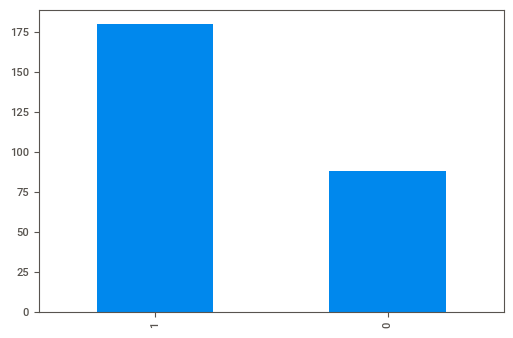

In [70]:
#Imbalanced dataset
df[0].value_counts().plot.bar()

# Over sampling technique to balance the data


In [71]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ovrsampled,y_oversampled=ros.fit_sample(x,y)

In [72]:
x.shape,x_ovrsampled.shape

((268, 70), (360, 70))

In [73]:
y.shape,y_oversampled.shape

((268,), (360,))

In [74]:
x_ovrsampled.shape[0]-x.shape[0] #Exta rows added due to oversampling technique.

92

In [75]:
y_oversampled

0      1
1      1
2      0
3      1
4      1
      ..
355    0
356    0
357    0
358    0
359    0
Name: 0, Length: 360, dtype: int64

# Model Building

In [76]:
x=x_ovrsampled
y=y_oversampled

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [79]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [80]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier()


Accuracy_score  - 0.9111111111111111


cross_val_score  - 0.913888888888889


classification report
               precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.95      0.87      0.91        45

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90



[[43  2]
 [ 6 39]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** SVC *******************


SVC()


Accuracy_score  - 0.9222222222222223


cross_val_score  - 0.875


classification report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.91      0.93      0.92        45

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighte

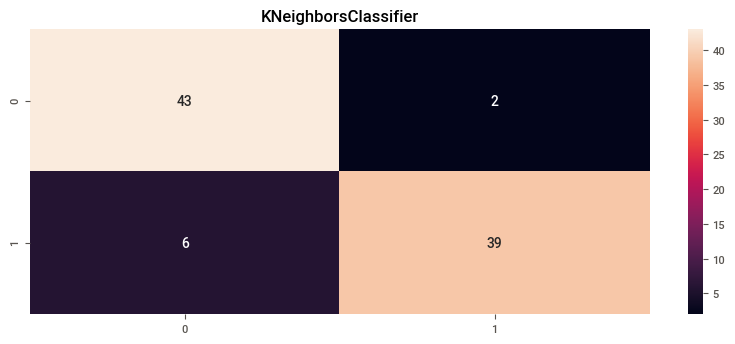

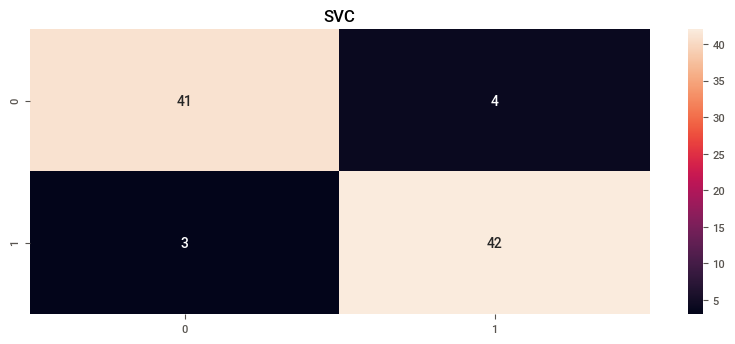

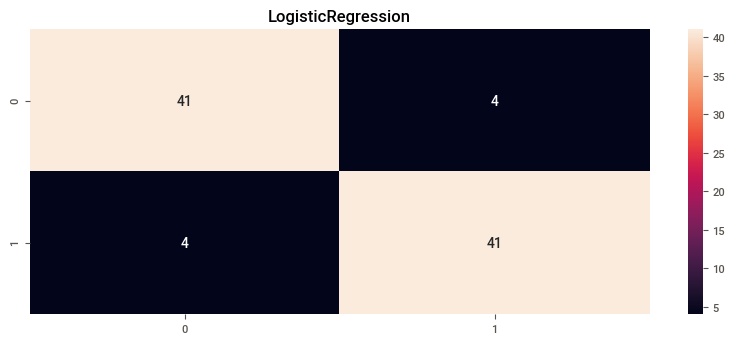

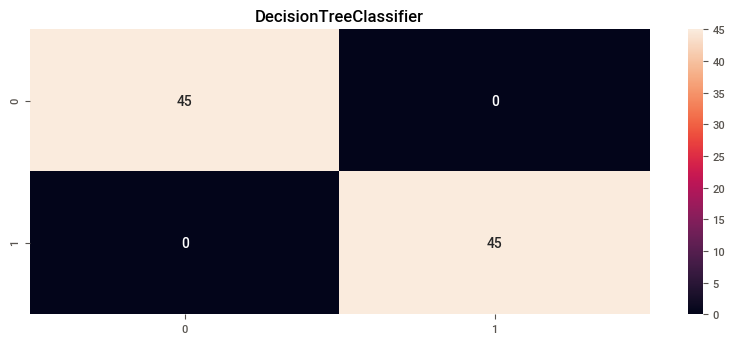

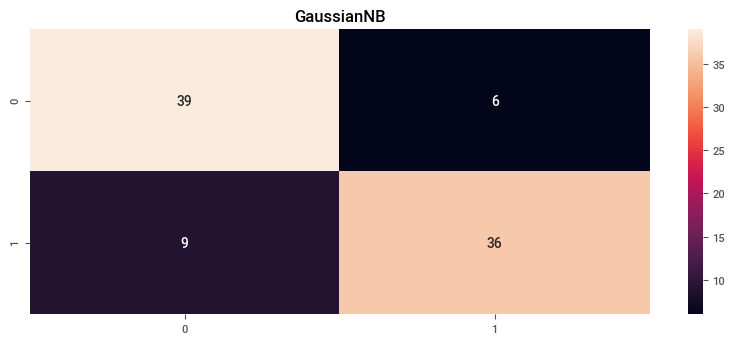

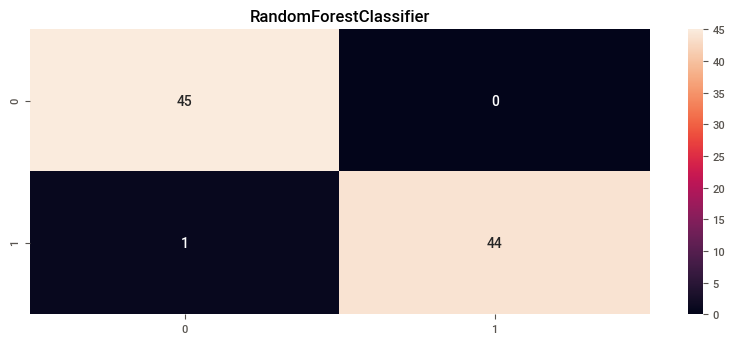

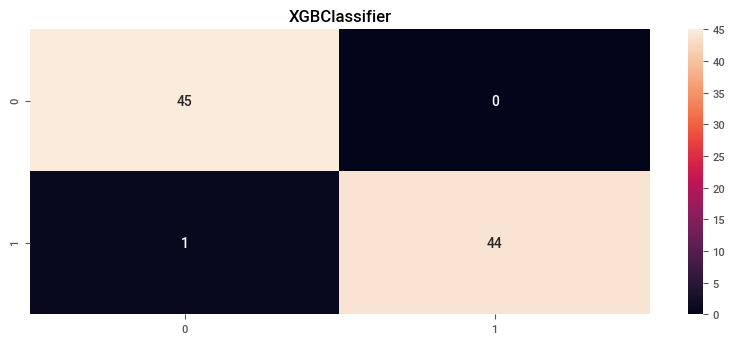

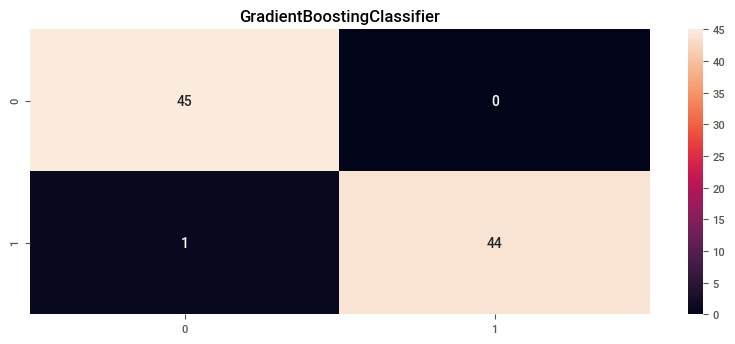

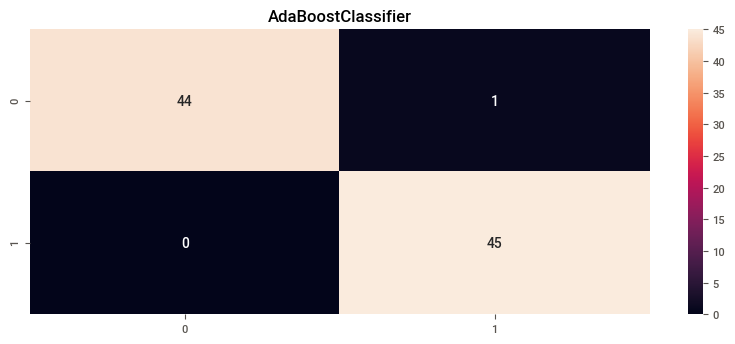

In [82]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    

In [83]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,91.111111,91.388889
1,SVC,92.222222,87.500000
2,LogisticRegression,91.111111,88.333333
3,DecisionTreeClassifier,100.000000,96.666667
4,GaussianNB,83.333333,76.944444
5,RandomForestClassifier,98.888889,96.388889
6,XGBClassifier,98.888889,97.222222
7,GradientBoostingClassifier,98.888889,97.500000
8,AdaBoostClassifier,98.888889,97.222222


In [84]:
#We can see from the table DecisionTreeClassifier is the best performing Algorithm.

In [85]:
#We will apply Gridsearchcv to the top performing models.

In [86]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [88]:
x.shape,y.shape

((360, 70), (360,))

In [89]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   48   which is   0.9333333333333333
knn 48
max_accuracy_score is at random_state   65   which is   0.9555555555555556
svc 65
max_accuracy_score is at random_state   73   which is   0.9444444444444444
lr 73
max_accuracy_score is at random_state   73   which is   1.0
dt 73
max_accuracy_score is at random_state   51   which is   0.8666666666666667
gnb 51
max_accuracy_score is at random_state   65   which is   1.0
rfc 65
max_accuracy_score is at random_state   65   which is   1.0
xgb 65
max_accuracy_score is at random_state   49   which is   1.0
gbc 49
max_accuracy_score is at random_state   58   which is   1.0
ada 58


# GridsearchCV

# model1->DecisionTreeClassifier(random_state=73)=100%

In [90]:
from sklearn.model_selection import GridSearchCV

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73,stratify=y)
dt=DecisionTreeClassifier()

In [100]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
grid_search=GridSearchCV(dt,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1)
dt.fit(x,y)
pred_dt=dt.predict(x_test)
score=accuracy_score(y_test,pred_dt)
print('Accuracy=  ',accuracy_score(y_test,pred_dt))

Accuracy=   0.9888888888888889


In [102]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1)
cvs=cross_val_score(dt,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(dt,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.975


array([[178,   8],
       [  2, 172]], dtype=int64)

# model2->XGBClassifier(random_state=65)=100%

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65)
xgb=XGBClassifier()

In [104]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5}

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=71)
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [106]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.975


array([[178,   7],
       [  2, 173]], dtype=int64)

# model3->GradientBoostingClassifier(random_state=49)=100%

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
gbc=GradientBoostingClassifier()

In [108]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=3)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 100}

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
rfc=RandomForestClassifier(min_samples_leaf=1,max_depth=7,n_estimators=100)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [110]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(min_samples_leaf=1,max_depth=7,n_estimators=1000)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=3)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9555555555555556


array([[173,   8],
       [  7, 172]], dtype=int64)

# Saving the final XGBClassifier model

In [111]:
#From all the model tried above XGBClassifier model cross_val_score is good.
#corresponding random_state=65
#Hence saving the final model as XGBClassifier model.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65)
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   1.0


In [112]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.6, learning_rate=0.1, max_depth=5)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=3)
xgb.fit(x,y)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.9555555555555556


array([[176,   7],
       [  4, 173]], dtype=int64)

In [113]:
import joblib
joblib.dump(xgb,'Customer retention problem project-xgb-riv-1.obj')

['Customer retention problem project-xgb-riv-1.obj']

In [114]:
model=joblib.load('Customer retention problem project-xgb-riv-1.obj')

In [115]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['1Gender of respondent'])
Final_predictions[:5]

,1Gender of respondent
0,1
1,1
2,0
3,1
4,1


# Saving final predictions in file.csv format

In [116]:
Final_predictions.to_csv('E:\\final_predictions_Customer_retention_project-riv-1',index=False)

# Conclusion:-